<a href="https://colab.research.google.com/github/orannahum/simple_example_of_GMM/blob/main/Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
>>> import numpy as np
>>> y0 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 0.1]], size=50)
>>> y1 = np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 2]], size=50)
>>> y2 = np.random.multivariate_normal([2, 2], [[2, -1.5], [-1.5, 2]], size=50)
>>> y3 = np.random.multivariate_normal([-2, -2], [[0.5, 0], [0, 0.5]], size=50)
>>> y = np.vstack([y0, y1, y2, y3])


In [70]:
!pip install bayespy


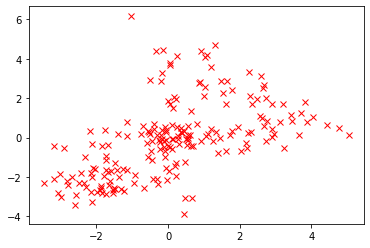

In [71]:
>>> import bayespy.plot as bpplt
>>> bpplt.pyplot.plot(y[:,0], y[:,1], 'rx')


In [72]:
N = 200


In [73]:
D = 2

In [74]:
K = 10

In [75]:
>>> from bayespy.nodes import Dirichlet, Categorical
>>> alpha = Dirichlet(1e-5*np.ones(K),
...                   name='alpha')
>>> Z = Categorical(alpha,
...                 plates=(N,),
...                 name='z')

In [76]:
>>> from bayespy.nodes import Gaussian, Wishart
>>> mu = Gaussian(np.zeros(D), 1e-5*np.identity(D),
...               plates=(K,),
...               name='mu')
>>> Lambda = Wishart(D, 1e-5*np.identity(D),
...                  plates=(K,),
...                  name='Lambda')

In [77]:
>>> from bayespy.nodes import Mixture
>>> Y = Mixture(Z, Gaussian, mu, Lambda,
...             name='Y')

In [78]:
>>> Z.initialize_from_random()
>>> from bayespy.inference import VB
>>> Q = VB(Y, mu, Lambda, Z, alpha)

In [79]:
>>> Y.observe(y)


In [80]:
>>> Q.update(repeat=1000)


Iteration 1: loglike=-1.424223e+03 (0.014 seconds)
Iteration 2: loglike=-1.291979e+03 (0.010 seconds)
Iteration 3: loglike=-1.283746e+03 (0.006 seconds)
Iteration 4: loglike=-1.278591e+03 (0.006 seconds)
Iteration 5: loglike=-1.275304e+03 (0.095 seconds)
Iteration 6: loglike=-1.272772e+03 (0.008 seconds)
Iteration 7: loglike=-1.270301e+03 (0.007 seconds)
Iteration 8: loglike=-1.267488e+03 (0.010 seconds)
Iteration 9: loglike=-1.264111e+03 (0.007 seconds)
Iteration 10: loglike=-1.260201e+03 (0.010 seconds)
Iteration 11: loglike=-1.255954e+03 (0.007 seconds)
Iteration 12: loglike=-1.251362e+03 (0.007 seconds)
Iteration 13: loglike=-1.246119e+03 (0.007 seconds)
Iteration 14: loglike=-1.239550e+03 (0.007 seconds)
Iteration 15: loglike=-1.230787e+03 (0.007 seconds)
Iteration 16: loglike=-1.219679e+03 (0.011 seconds)
Iteration 17: loglike=-1.205667e+03 (0.007 seconds)
Iteration 18: loglike=-1.184626e+03 (0.007 seconds)
Iteration 19: loglike=-1.146572e+03 (0.006 seconds)
Iteration 20: loglike

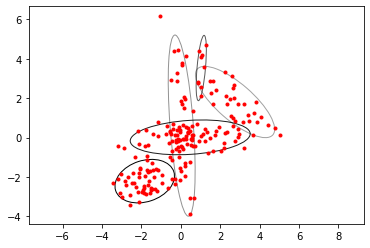

In [81]:
>>> bpplt.gaussian_mixture_2d(Y, alpha=alpha, scale=2)
